### Prediction On Pima Indian Diabetes Dataset 

#### Importing required libraries 📚  

In [1]:
# Linear Algebra 
import numpy as np

# Data processing
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Import warnings
import warnings

# filter warnings
warnings.filterwarnings('ignore')

# Outcomes
from sklearn.metrics import confusion_matrix, accuracy_score

#### Reading dataset   📑

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### 🔎  Data Exploration/ Analysis  

In [3]:
data.shape

(768, 9)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- Missing Value Analysis

In [6]:
# Check missing values 
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No missing value.Means,no need to fill null values.

##### 📊 Basic Visualization

<AxesSubplot:xlabel='Outcome', ylabel='count'>

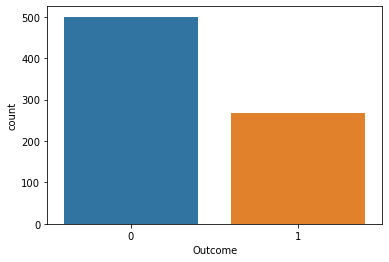

In [7]:
#counting values of outcomes having 0 and 1, 0 means non-diabetic and 1 means diaetic
sns.countplot(data.Outcome)

In [8]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

Next, We will define dependent and independent variable.

In [9]:
# Define dependent and independent variables.
X = data.drop('Outcome', axis=1)
y = data['Outcome']

#### Splitting data into training and testing subset  ⏳

In [10]:
# Convert the dataset into training and testing subsets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [11]:
# Perform feature scaling to rescale the training dataset
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

### 🗄 Model Building

#### 📌  Logistic Regression

In [12]:
# Create Logistic regression model on training dataset
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Testing model on test data and predict output
y_pred1 = logreg.predict(X_test)

In [14]:
# Accuracy score
acc_score1 = accuracy_score(y_test, y_pred1)*100
print("Accuracy score of Logistic Regression Model:",acc_score1)

Accuracy score of Logistic Regression Model: 79.87012987012987


Confusion matrix : 
 [[94 13]
 [18 29]]


<AxesSubplot:>

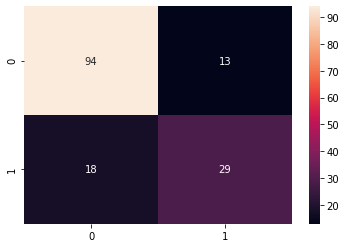

In [15]:
# Analyze the output using confusion matrix
cm1 = confusion_matrix(y_test, y_pred1)
print("Confusion matrix : \n", cm1)
sns.heatmap(cm1, annot=True)

#### 📌 Random Forest Classification 

In [16]:
# Create Random Forest Classification Model on training dataset.
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
# Testing the model on test dataset and predict the output.
y_pred2 = random_forest.predict(X_test)

In [18]:
# Accuracy Score
acc_score2 = accuracy_score(y_test,y_pred2)*100
print("Accuracy Score of Random Forest Classification Model: ",acc_score2)

Accuracy Score of Random Forest Classification Model:  79.87012987012987


Confusion matrix : 
 [[88 19]
 [12 35]]


<AxesSubplot:>

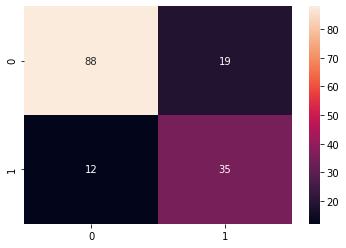

In [19]:
# Analyze the output using confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)
print("Confusion matrix : \n", cm2)
sns.heatmap(cm2, annot=True)

#### 📌 Decision Tree Classification

In [20]:
# Create decision tree classification model
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train) 

DecisionTreeClassifier()

In [21]:
# Testing model on test data and predict output
y_pred3 = decision_tree.predict(X_test)

In [22]:
# Accuracy score
acc_score3 = accuracy_score(y_test, y_pred3)*100
print("Accuracy Score of Decision Tree Classification Model: ",acc_score3)

Accuracy Score of Decision Tree Classification Model:  70.77922077922078


Confusion matrix : 
 [[78 29]
 [16 31]]


<AxesSubplot:>

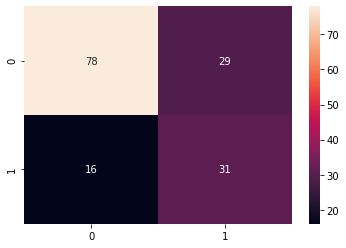

In [23]:
# Analyze the output using confusion matrix
cm3 = confusion_matrix(y_test, y_pred3)
print("Confusion matrix : \n", cm3)
sns.heatmap(cm3, annot=True)

#### 📌 K NearestNeighbor

In [24]:
# Find the value of k using SQRT method.
k = int(np.sqrt(X_train.shape[0]))
k

24

In [25]:
# Create KNN model 
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=24)

In [26]:
# Testing model on test data and predict output
y_pred4 = knn.predict(X_test)

In [27]:
# Accuracy score
acc_score4 = accuracy_score(y_test, y_pred4)*100
print("Accuracy Score of KNN Classification Model: ",acc_score4)

Accuracy Score of KNN Classification Model:  78.57142857142857


Confusion matrix : 
 [[99  8]
 [25 22]]


<AxesSubplot:>

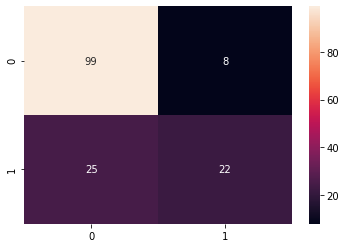

In [28]:
# Analyze the output using confusion matrix
cm4 = confusion_matrix(y_test, y_pred4)
print("Confusion matrix : \n", cm4)
sns.heatmap(cm4, annot=True)

#### 📌 SVM 

In [29]:
# Create SVM classification model
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [30]:
# Testing model on test data and predict output
y_pred5 = classifier.predict(X_test)

In [31]:
acc_score5 = accuracy_score(y_test,y_pred5)*100
print("Accuracy Score of SVM Classification Model:",acc_score5)

Accuracy Score of SVM Classification Model: 81.16883116883116


Confusion matrix : 
 [[96 11]
 [18 29]]


<AxesSubplot:>

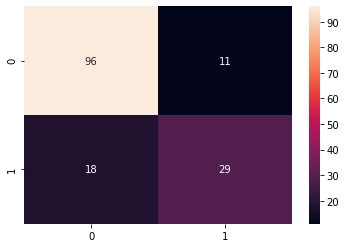

In [32]:
# Analyze the output using confusion matrix
cm5 = confusion_matrix(y_test, y_pred5)
print("Confusion matrix : \n", cm5)
sns.heatmap(cm5, annot=True)

### 📝 Final Result  

In [33]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest','Decision Tree','K Nearest Neighbor','SVM'],
    'Score': [acc_score1, acc_score2,acc_score3,acc_score4,acc_score5]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(5)

,Model
Score,
81.168831,SVM
79.870130,Logistic Regression
79.870130,Random Forest
78.571429,K Nearest Neighbor
70.779221,Decision Tree


### 🖋 Conclusion 

We have used Logistic Regression, Random Forest Classification, Decision Tree, K Nearest Neighbor, Support Vector Machine models to predict the onset of diabetes within five years in women with Pima Indian heritage who were given medical details about their bodies.As a result of comparing this models, it is observed that SVM model gives highest accuracy score(81.16%).